# Julia sets and Mandelbrot set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

In [2]:
# Examples of complex valued functions

def f1(z, c=-.065+.66j):
    return z**2 + c

def f2(z, c=-.06+.67j):
    return z**2 + c

In [3]:
# Naive Julia set (escape time) computation

def JuliaNaive(f, zmin, zmax, m, n, tmax=256):
    
    xs = np.linspace(zmin.real, zmax.real, n)
    ys = np.linspace(zmin.imag, zmax.imag, m)
    
    J = np.ones((m, n)) * tmax
    
    for r, y in enumerate(ys):
        for c, x in enumerate(xs):
            z = x + 1j * y
            for t in range(tmax):
                z = f(z)
                if np.abs(z) > 2:
                    J[r,c] = t
                    break
    return J

In [8]:
# Efficient Julia set (escape time) computation

def Julia(f, zmin, zmax, m, n, tmax=256):
    
    xs = np.linspace(zmin.real, zmax.real, n)
    ys = np.linspace(zmin.imag, zmax.imag, m)

    X, Y = np.meshgrid(xs, ys)
    
    Z = X + 1j * Y
    
    J = np.ones(Z.shape) * tmax

    for t in range(tmax):
        mask = np.abs(Z) <= 2.
        Z[ mask] = f(Z[mask])
        J[~mask] -= 1
    
    return J

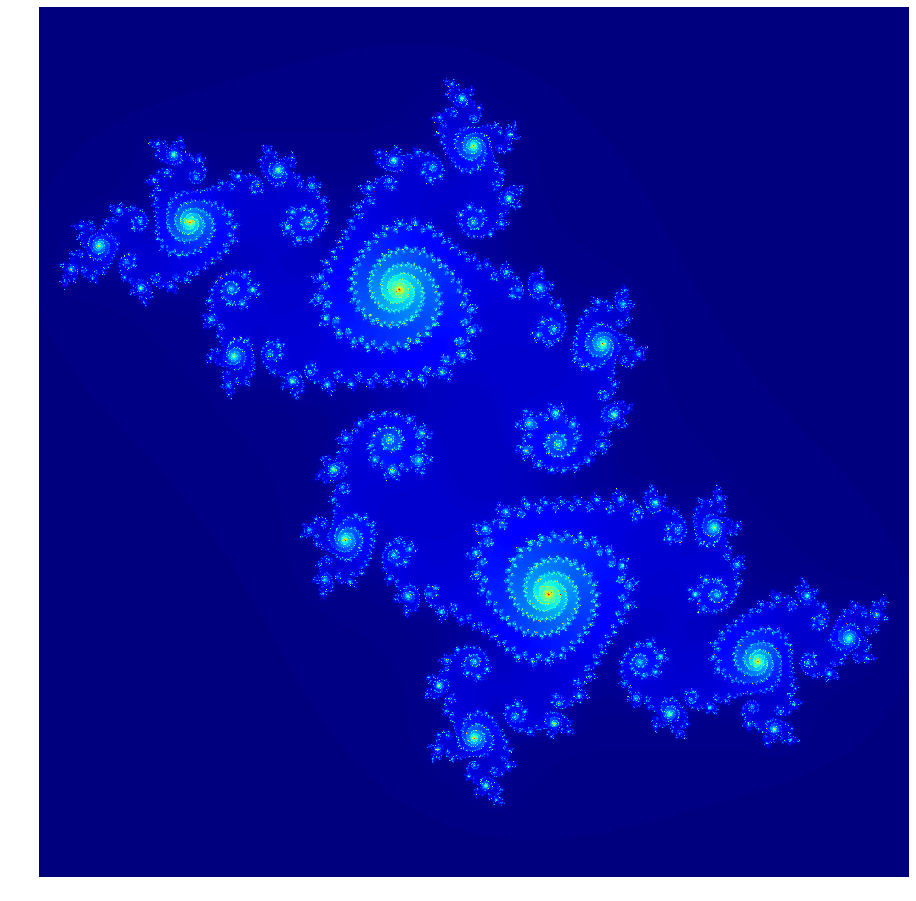

In [96]:
# compute array J of escape times
zmin = -1.3 - 1j * 1.3
zmax =  1.3 + 1j * 1.3
J = Julia(f1, zmin, zmax, m=1024, n=1024, tmax=1024)

# plt.imsave(name, J, cmap=cmap, origin='lower') 
plt.figure(figsize = (16, 16))
plt.imshow(J, cmap=cm.jet, origin='lower')
plt.axis('off')
plt.show()

In [ ]:
# get list of names of matplotlib color maps
cmaps = [m for m in plt.cm.datad]

# iterate over color map names, determine
# color map and file name for image to be
# written and save image using matplotlib
for i, cmap in enumerate(cmaps):
    c = plt.get_cmap(cmap)
    # n = 'julia-%d.png' % i
    # plt.imsave(n, J, cmap=c, origin='lower') 
    plt.title(c.name)
    plt.imshow(J, cmap=c, origin='lower') 
    plt.axis('off')
    plt.show()

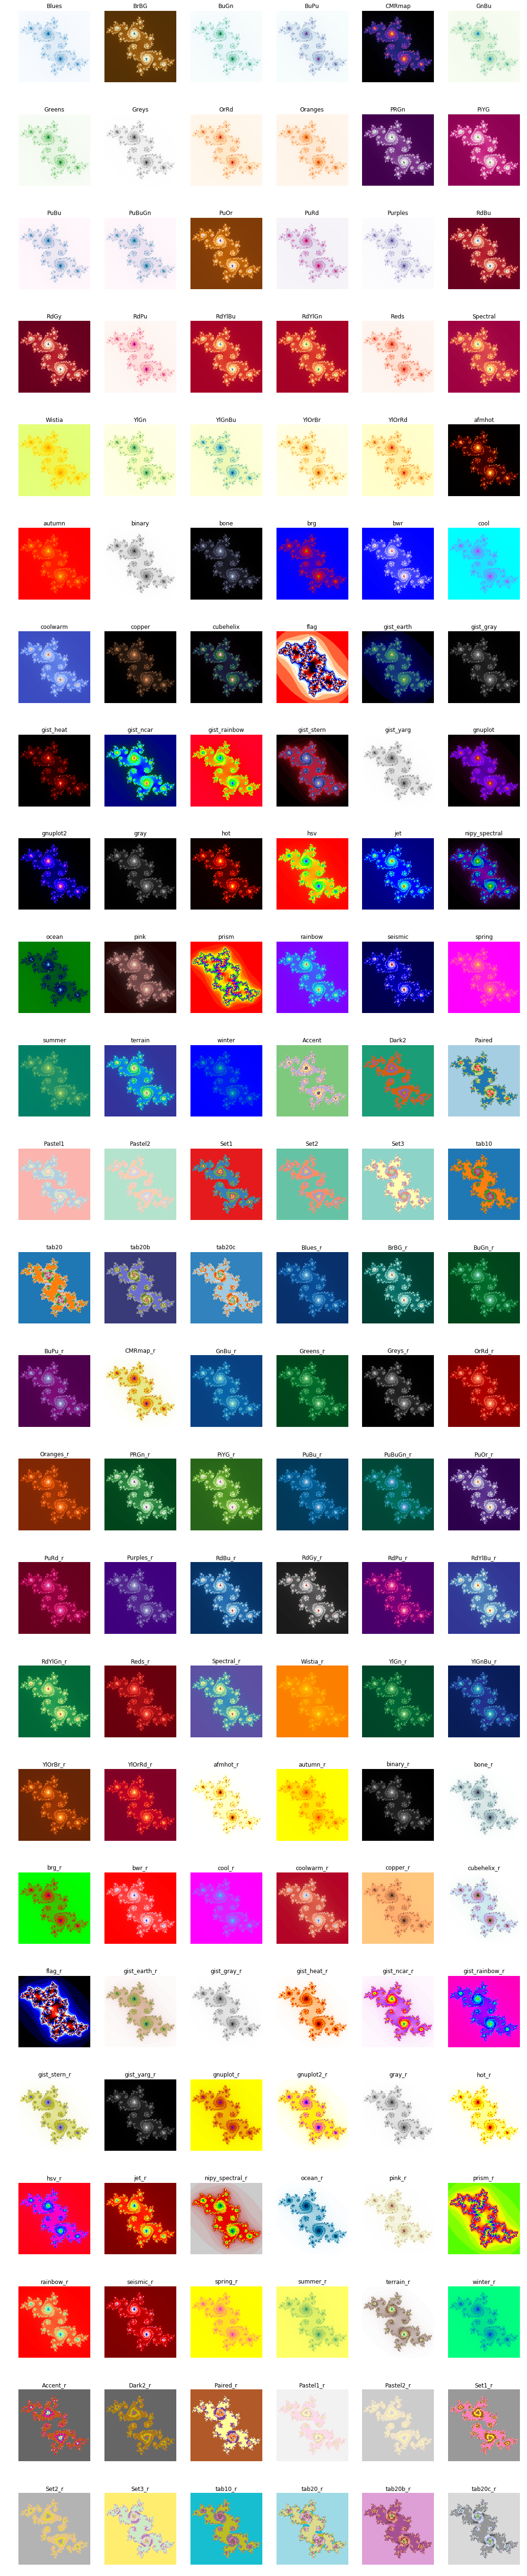

In [32]:
n_plots = len(cmaps)
ppr = 6

f, a = plt.subplots((n_plots + ppr - 1) // ppr, ppr)    
f.set_figheight(100)
f.set_figwidth(19)

for i, cmap in enumerate(cmaps):
    c = plt.get_cmap(cmap)
    row = i // ppr
    col = i % ppr
    a[row, col].imshow(J, cmap=c, origin='lower') 
    a[row, col].set_title(c.name)
    a[row, col].axis('off')

In [130]:
def Mandelbrot(zmin, zmax, m, n, tmax=256):
    
    xs = np.linspace(zmin.real, zmax.real, n)
    ys = np.linspace(zmin.imag, zmax.imag, m)
    
    X, Y = np.meshgrid(xs, ys)
    C = X + 1j * Y
    
    Z = np.copy(C)
    M = np.ones(Z.shape) * tmax
    
    for t in range(tmax):
        mask = np.abs(Z) <= 2.
        Z[ mask] = Z[mask] ** 2 + C[mask]
        M[~mask] -= 1.
    
    return M 

In [131]:
# compute array J of escape times
zmin = -2.3 - 1j * 1.3
zmax =  0.5 + 1j * 1.3
M = Mandelbrot(zmin, zmax, m=1024, n=1024)

In [132]:
max_iterations = M.max()
M[M == max_iterations] = 0

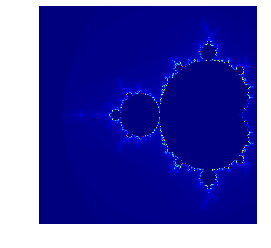

In [133]:
cmap = 'YlOrRd_r'
plt.imshow(M, cmap='jet', origin='lower')
plt.axis('off')
plt.show()

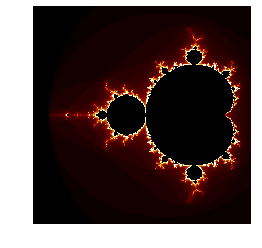

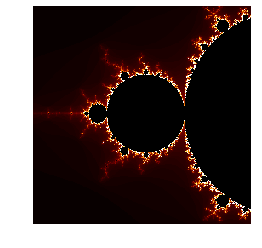

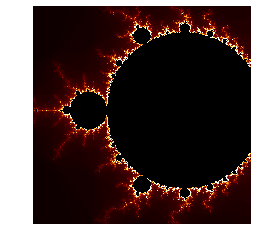

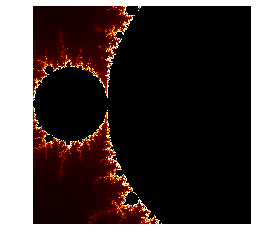

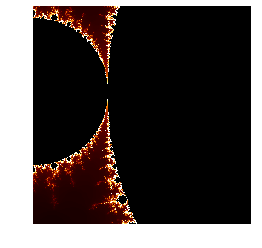

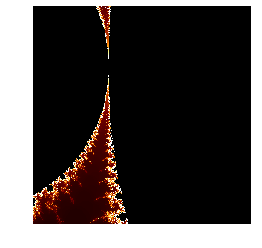

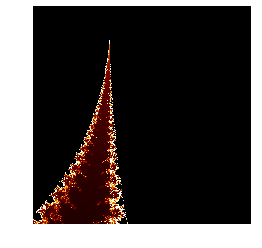

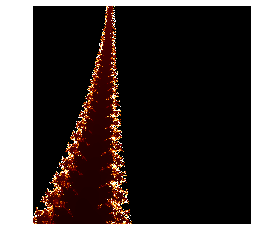

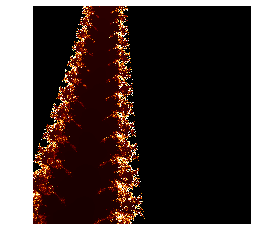

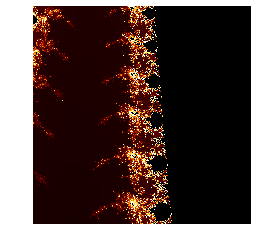

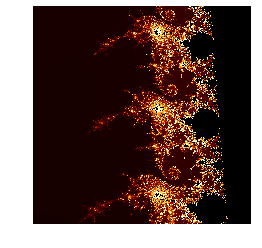

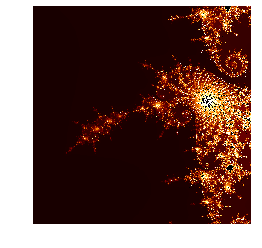

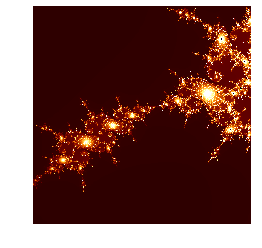

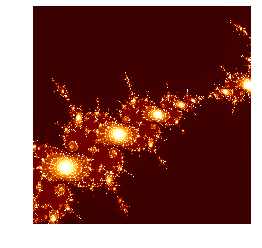

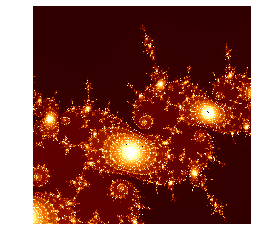

In [135]:
tmax = 2048
n_points = 256
n_steps = 15

length_start = 2.8
center_start = -0.8 + 0.0j

length_end = 0.00017
center_end = -1.25058 - 0.02004j

lengths = np.geomspace(length_start, length_end, n_steps)
diagonal = 0.5 + 0.5j

for length in lengths:

    offset = (length - length_start) / (length_end - length_start)
    center = center_start + offset * (center_end - center_start)
    zmin = center - length * diagonal
    zmax = center + length * diagonal
    
    M = Mandelbrot(zmin, zmax, m=n_points, n=n_points, tmax = tmax)
    M[M == tmax] = 0
    
    plt.imshow(M, cmap='afmhot', origin='lower', vmax = np.quantile(M, 0.99))
    plt.axis('off')
    plt.show()

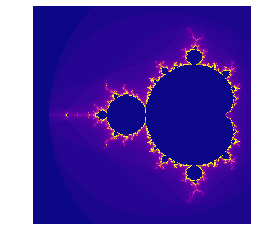

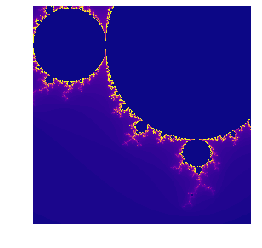

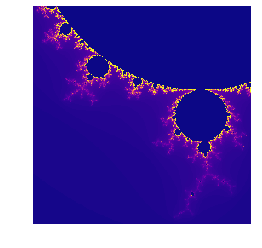

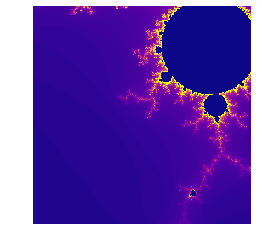

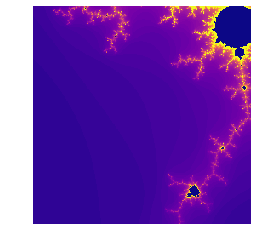

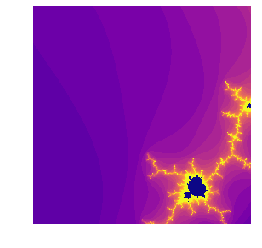

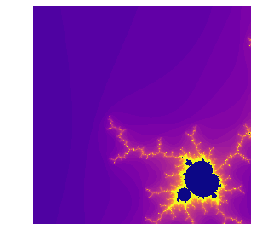

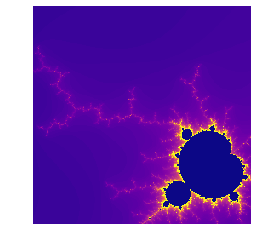

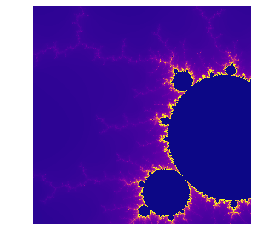

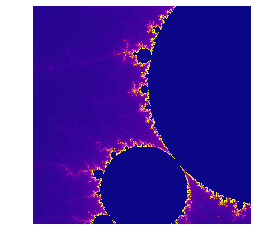

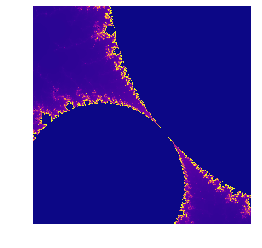

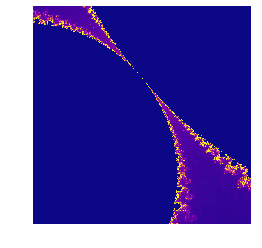

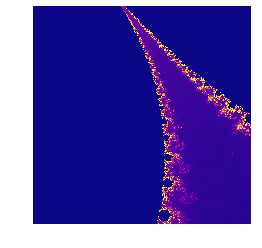

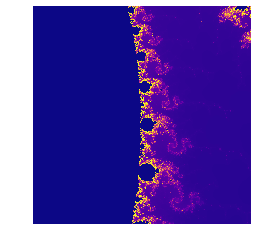

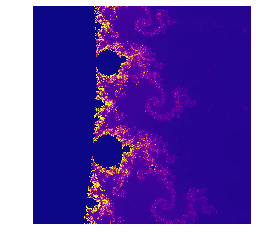

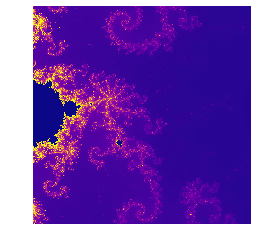

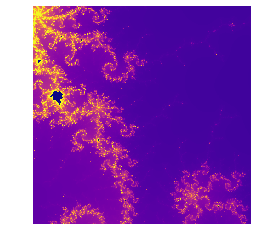

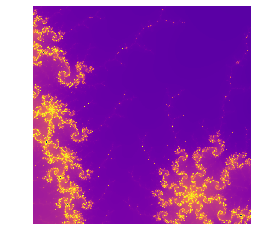

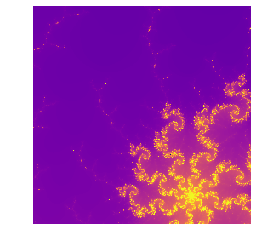

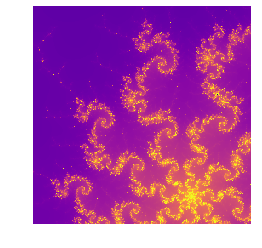

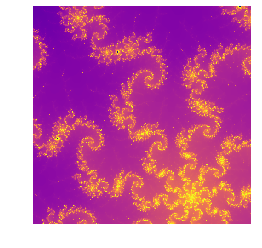

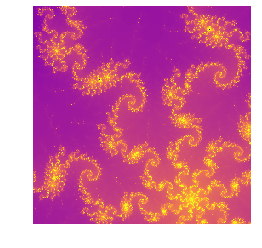

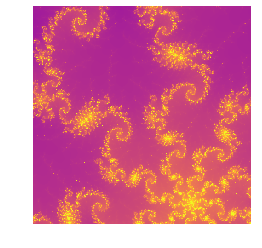

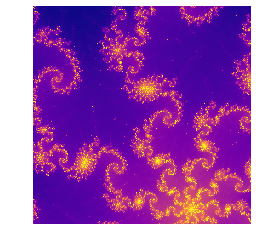

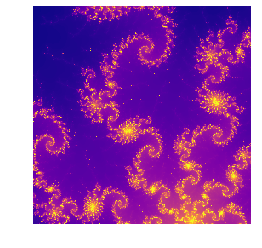

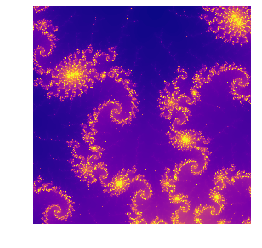

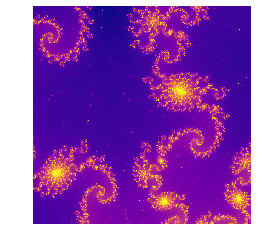

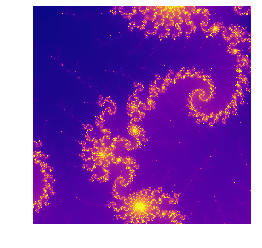

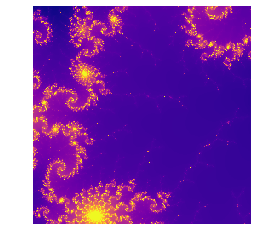

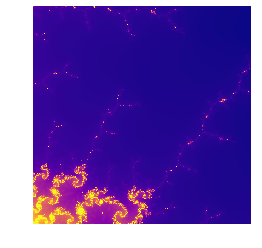

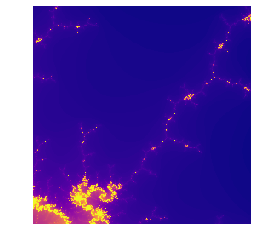

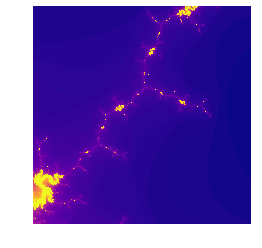

In [129]:
tmax = 4096
n_points = 256
n_steps = 32

length_start = 2.8
center_start = -0.8 + 1j * 0

length_end =  0.00000001
center_end = -0.16070134 - 1j * 1.0375664

lengths = np.geomspace(length_start, length_end, n_steps)
diagonal = 0.5 + 1j * 0.5

for length in lengths:

    offset = (length - length_start) / (length_end - length_start)
    center = center_start + offset * (center_end - center_start)
    zmin = center - length * diagonal
    zmax = center + length * diagonal
    
    M = Mandelbrot(zmin, zmax, m=n_points, n=n_points, tmax = tmax)
    M[M == tmax] = 0
    
    plt.imshow(M, cmap='plasma', origin='lower', vmax = np.quantile(M, 0.99))
    plt.axis('off')
    plt.show()    

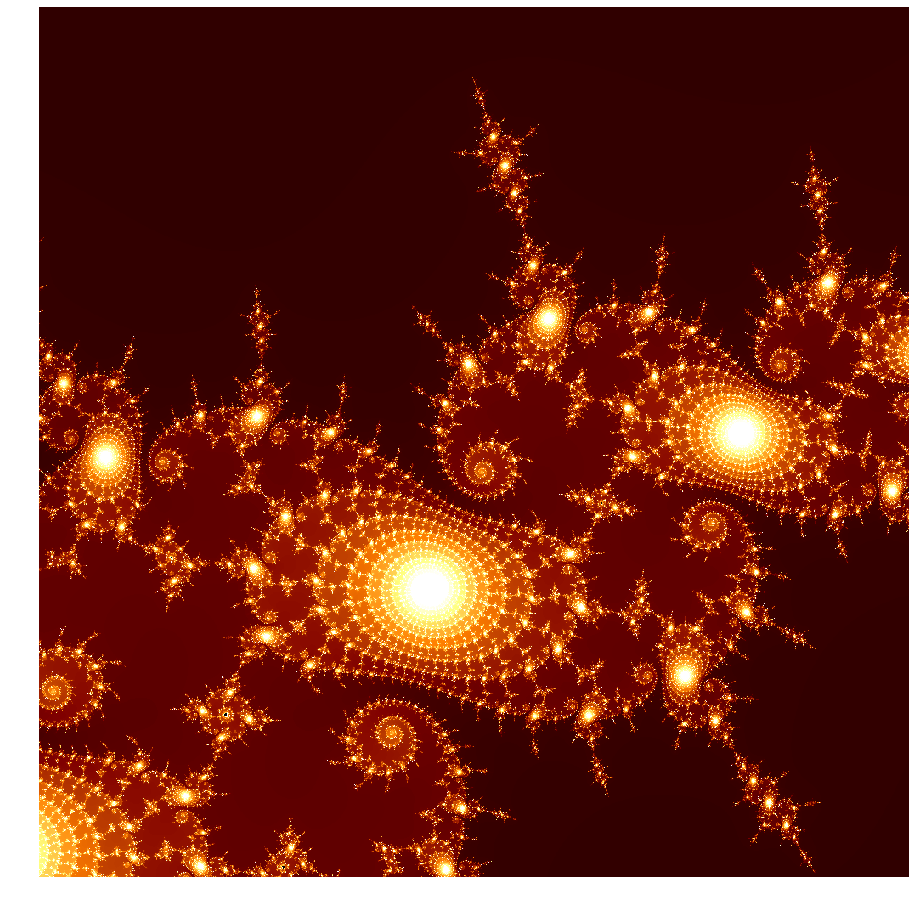

In [137]:
tmax = 4096
n_points = 1024

length_end = 0.00017
center_end = -1.25058 - 0.02004j

diagonal = 0.5 + 0.5j

zmin = center_end - length_end * diagonal
zmax = center_end + length_end * diagonal
    
M = Mandelbrot(zmin, zmax, m=n_points, n=n_points, tmax = tmax)
M[M == tmax] = 0
    
plt.figure(figsize = (16, 16))
plt.imshow(M, cmap='afmhot', origin='lower', vmax = np.quantile(M, 0.99))
plt.axis('off')
plt.show()